<a href="https://colab.research.google.com/github/anweshaban21/Portfolio_Agents/blob/main/LatticeStructure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install yfinance arch statsmodels matplotlib pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 13.3 MB/s eta 0:00:00


In [1]:
pip install numpy pandas matplotlib yfinance arch statsmodels scikit-learn tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 18.3 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


=== BULLISH MARKET ANALYSIS (2023-03-01 to 2023-07-31) ===




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


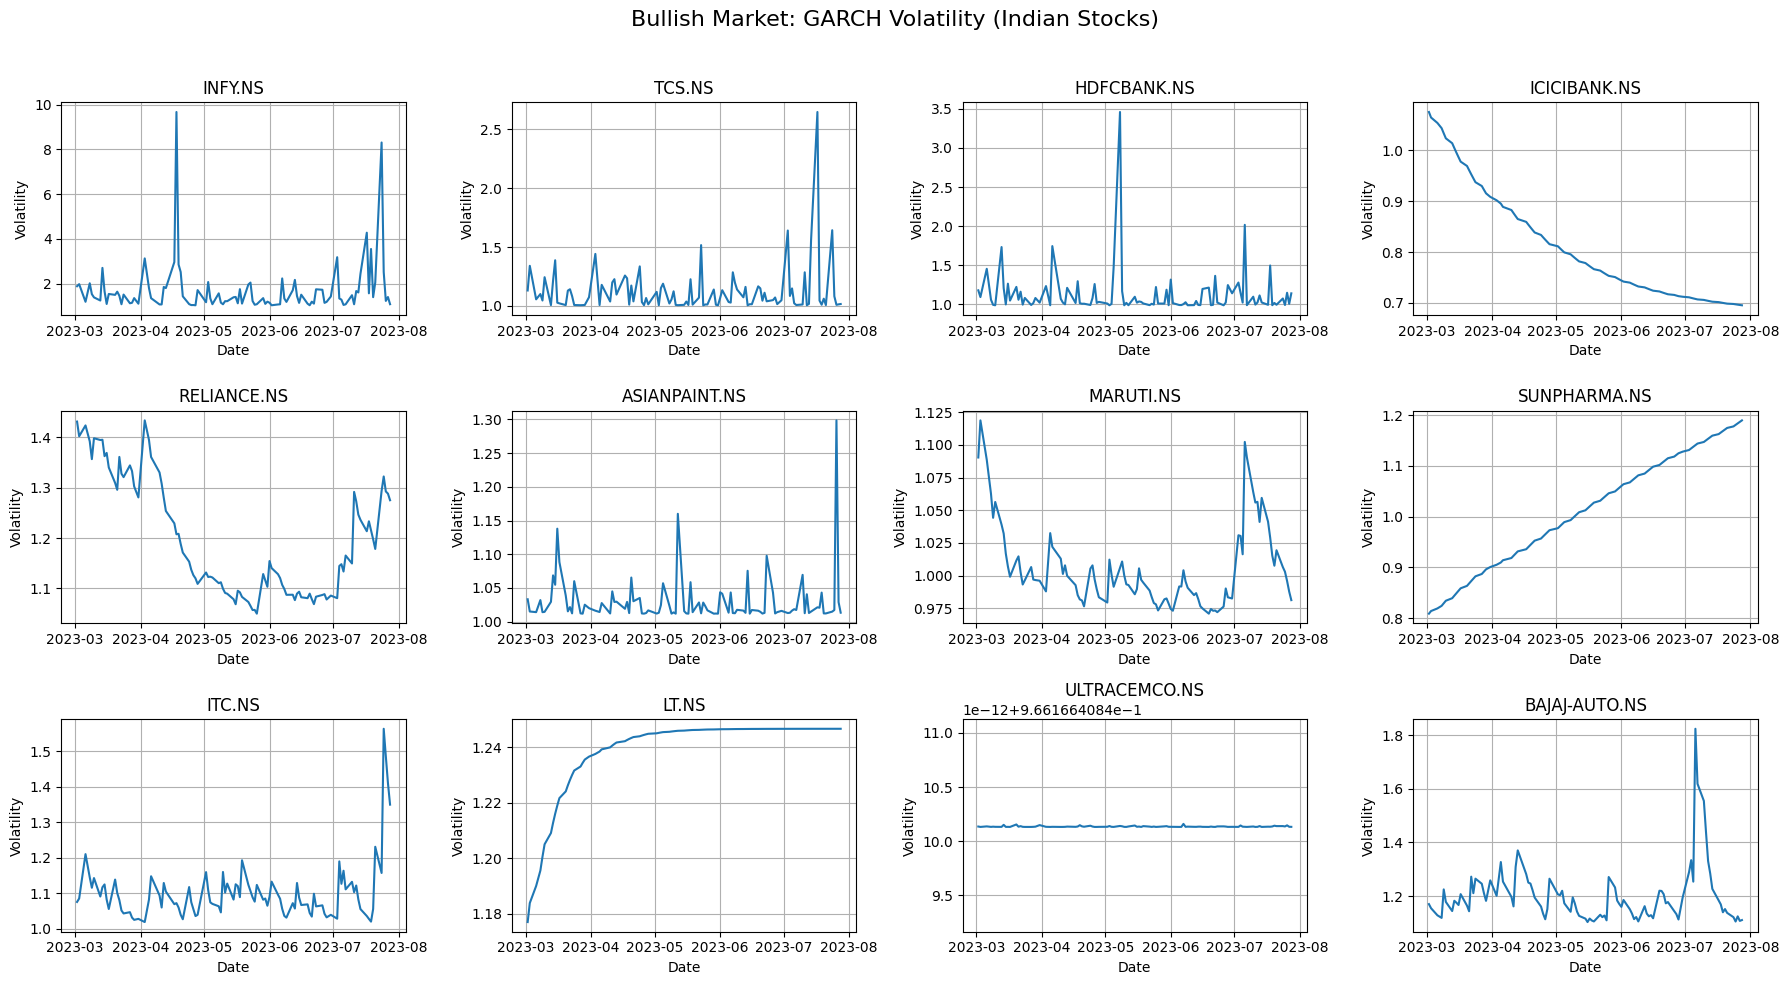

[*********************100%***********************]  1 of 1 completed

        Stock   Beta  Avg_GARCH_Volatility
 ICICIBANK.NS 0.8406                0.8064
ULTRACEMCO.NS 0.5736                0.9662
    MARUTI.NS 0.4506                1.0059
 SUNPHARMA.NS 0.2947                1.0168
ASIANPAINT.NS 0.2618                1.0298
       ITC.NS 0.7817                1.1015
  HDFCBANK.NS 1.2456                1.1221
       TCS.NS 0.9347                1.1235
  RELIANCE.NS 1.5036                1.1960
BAJAJ-AUTO.NS 0.7050                1.1987
        LT.NS 0.6724                1.2395
      INFY.NS 1.6759                1.6901

✅ Safest Option in BULLISH Market: ICICIBANK.NS (Beta=0.8406, Vol=0.8064)


=== BEARISH MARKET ANALYSIS (2022-09-01 to 2022-12-31) ===




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


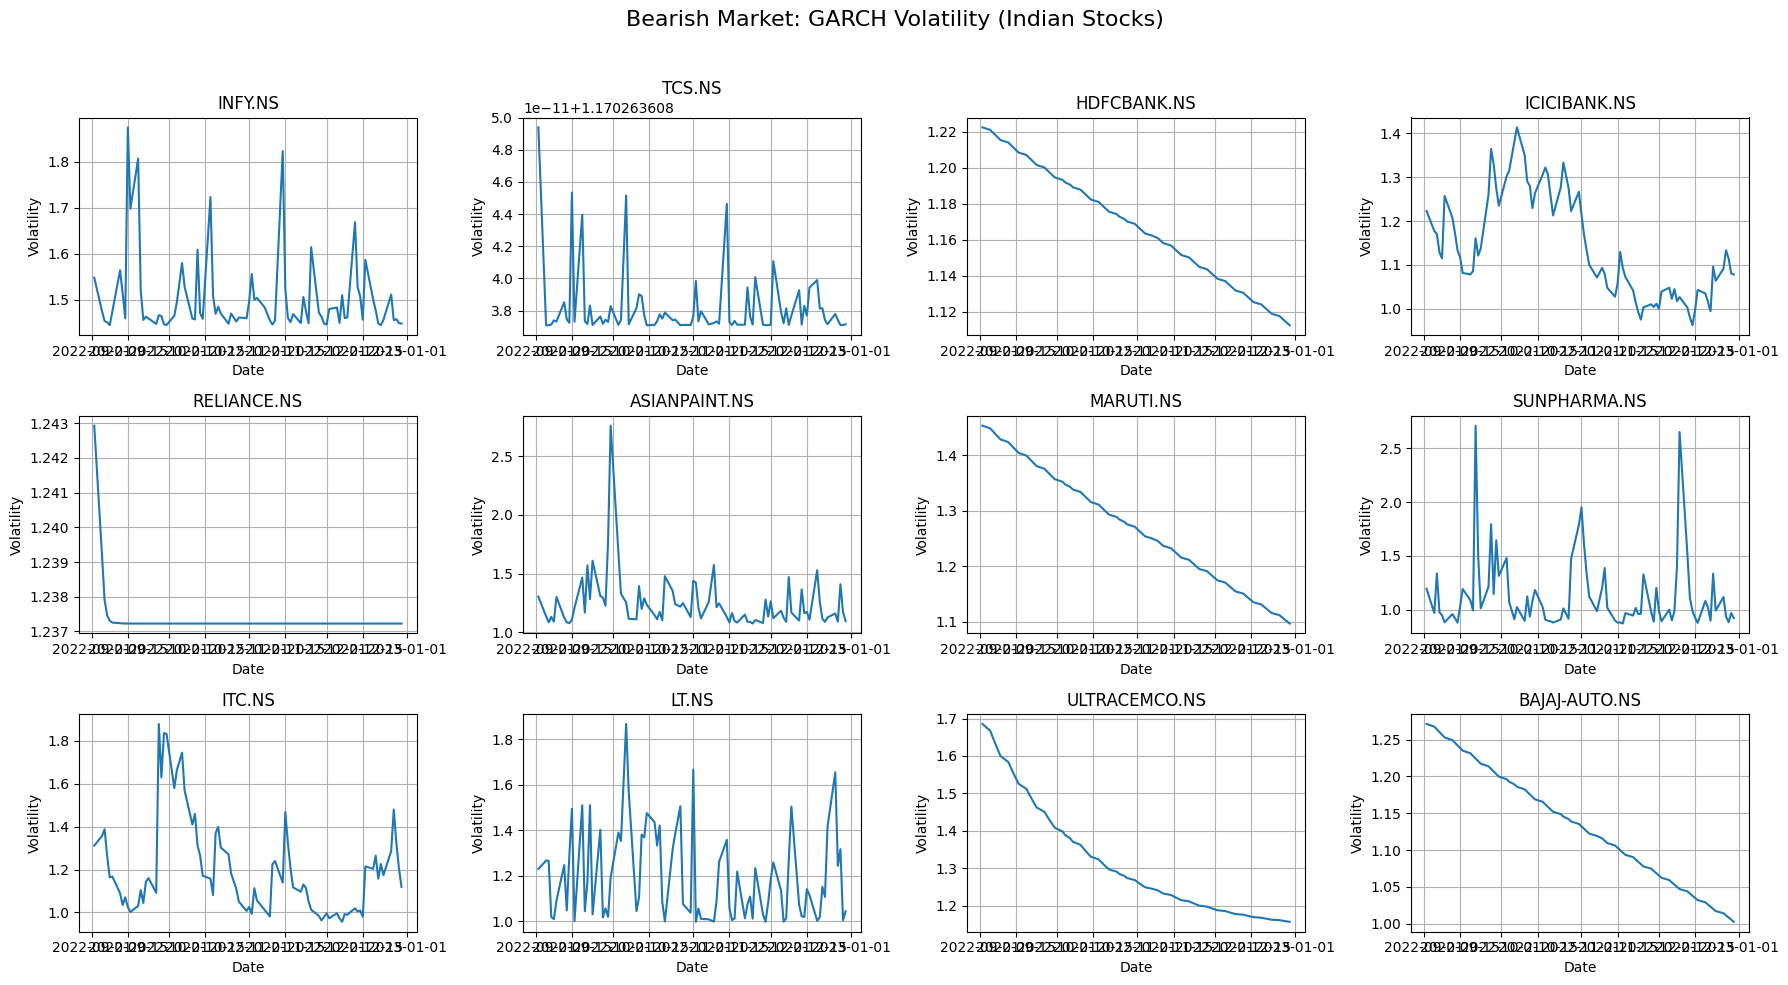

        Stock   Beta  Avg_GARCH_Volatility
 SUNPHARMA.NS 0.4088                1.1302
BAJAJ-AUTO.NS 0.8656                1.1316
 ICICIBANK.NS 0.9622                1.1407
  HDFCBANK.NS 1.1625                1.1666
       TCS.NS 0.8844                1.1703
        LT.NS 1.0514                1.1938
       ITC.NS 0.8304                1.1987
  RELIANCE.NS 1.1060                1.2373
ASIANPAINT.NS 0.3966                1.2443
    MARUTI.NS 0.8566                1.2666
ULTRACEMCO.NS 1.0092                1.3121
      INFY.NS 1.2140                1.5010

✅ Safest Option in BEARISH Market: SUNPHARMA.NS (Beta=0.4088, Vol=1.1302)



In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import statsmodels.api as sm

# Periods (can be fine-tuned)
bullish_period = ('2023-03-01', '2023-07-31')
bearish_period = ('2022-09-01', '2022-12-31')

# Indian stocks list
stocks = [
    "INFY.NS", "TCS.NS", "HDFCBANK.NS", "ICICIBANK.NS", "RELIANCE.NS",
    "ASIANPAINT.NS", "MARUTI.NS", "SUNPHARMA.NS", "ITC.NS", "LT.NS",
    "ULTRACEMCO.NS", "BAJAJ-AUTO.NS", "TITAN.NS", "WIPRO.NS", "ZOMATO.NS"
]
index_symbol = "^NSEI"  # Nifty 50

def analyze_stocks(period, label):
    start, end = period
    print(f"\n=== {label.upper()} MARKET ANALYSIS ({start} to {end}) ===\n")

    results = []
    index_data = yf.download(index_symbol, start=start, end=end, auto_adjust=False)['Adj Close']
    index_returns = np.log(index_data / index_data.shift(1)).dropna()

    plt.figure(figsize=(18, 10))
    plt.suptitle(f"{label.capitalize()} Market: GARCH Volatility (Indian Stocks)", fontsize=16)

    for i, stock in enumerate(stocks[:12]):  # Plot only 12 to avoid clutter
        try:
            stock_data = yf.download(stock, start=start, end=end, auto_adjust=False)['Adj Close']
            stock_returns = np.log(stock_data / stock_data.shift(1)).dropna()
            combined = pd.concat([stock_returns, index_returns], axis=1).dropna()
            combined.columns = ['Stock', 'Market']

            # Beta calculation
            X = sm.add_constant(combined['Market'])
            model = sm.OLS(combined['Stock'], X).fit()
            beta = model.params['Market']

            # GARCH volatility
            am = arch_model(combined['Stock'] * 100, vol='GARCH', p=1, q=1)
            res = am.fit(disp='off')
            avg_vol = np.mean(res.conditional_volatility)

            # Plot GARCH
            plt.subplot(3, 4, i + 1)
            plt.plot(res.conditional_volatility, label=stock)
            plt.title(f"{stock}")
            plt.grid(True)
            plt.xlabel("Date")
            plt.ylabel("Volatility")

            results.append({
                'Stock': stock,
                'Beta': round(beta, 4),
                'Avg_GARCH_Volatility': round(avg_vol, 4)
            })

        except Exception as e:
            print(f"Error processing {stock}: {e}")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    df = pd.DataFrame(results)
    df = df.sort_values(by=['Avg_GARCH_Volatility', 'Beta'])
    print(df.to_string(index=False))

    safest = df.iloc[0]
    print(f"\n✅ Safest Option in {label.upper()} Market: {safest['Stock']} (Beta={safest['Beta']}, Vol={safest['Avg_GARCH_Volatility']})\n")
    return df

# Run both periods
bullish_df = analyze_stocks(bullish_period, 'bullish')
bearish_df = analyze_stocks(bearish_period, 'bearish')


In [5]:
def recommend_stocks(
    stocks, index_symbol, start_date, end_date,
    top_n=3, risk_weights=(0.6, 0.4)
):
    import yfinance as yf
    import pandas as pd
    import numpy as np
    from arch import arch_model
    import statsmodels.api as sm

    vol_weight, beta_weight = risk_weights
    results = []

    # Get index data
    index_data = yf.download(index_symbol, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
    index_returns = np.log(index_data / index_data.shift(1)).dropna()

    for stock in stocks:
        try:
            stock_data = yf.download(stock, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
            stock_returns = np.log(stock_data / stock_data.shift(1)).dropna()
            combined = pd.concat([stock_returns, index_returns], axis=1).dropna()
            combined.columns = ['Stock', 'Market']

            # Beta
            X = sm.add_constant(combined['Market'])
            model = sm.OLS(combined['Stock'], X).fit()
            beta = model.params['Market']

            # GARCH volatility
            am = arch_model(combined['Stock'] * 100, vol='GARCH', p=1, q=1)
            res = am.fit(disp='off')
            avg_vol = np.mean(res.conditional_volatility)

            # Compute risk score
            risk_score = vol_weight * avg_vol + beta_weight * beta

            results.append({
                'Stock': stock,
                'Beta': round(beta, 4),
                'Avg_GARCH_Volatility': round(avg_vol, 4),
                'Risk_Score': round(risk_score, 4)
            })

        except Exception as e:
            print(f"Error processing {stock}: {e}")

    df = pd.DataFrame(results)
    df = df.sort_values(by='Risk_Score')
    print(df.to_string(index=False))

    recommended = df.head(top_n)
    print(f"\n✅ Top {top_n} Safest Stocks (Lowest Risk Score):")
    for _, row in recommended.iterrows():
        print(f"{row['Stock']} → Risk Score: {row['Risk_Score']}, Beta: {row['Beta']}, Vol: {row['Avg_GARCH_Volatility']}")

    return recommended

In [6]:
stocks = [
    "INFY.NS", "TCS.NS", "HDFCBANK.NS", "ICICIBANK.NS", "RELIANCE.NS",
    "ASIANPAINT.NS", "MARUTI.NS", "SUNPHARMA.NS", "ITC.NS", "LT.NS",
    "ULTRACEMCO.NS", "BAJAJ-AUTO.NS", "TITAN.NS", "WIPRO.NS", "ZOMATO.NS"
]

recommend_stocks(
    stocks=stocks,
    index_symbol="^NSEI",
    start_date="2023-01-01",
    end_date="2023-06-30",
    top_n=5,
    risk_weights=(0.6, 0.4)
)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

        Stock   Beta  Avg_GARCH_Volatility  Risk_Score
 SUNPHARMA.NS 0.3288                0.9459      0.6991
    MARUTI.NS 0.4261                0.9302      0.7286
ASIANPAINT.NS 0.4218                1.0844      0.8194
ULTRACEMCO.NS 0.5033                1.0562      0.8350
       ITC.NS 0.4764                1.0861      0.8422
BAJAJ-AUTO.NS 0.4164                1.2876      0.9391
 ICICIBANK.NS 0.9933                0.9137      0.9455
     TITAN.NS 0.7233                1.1589      0.9846
     WIPRO.NS 0.8982                1.0440      0.9857
       TCS.NS 0.9335                1.0525      1.0049
        LT.NS 0.7232                1.1984      1.0083
  HDFCBANK.NS 1.2220                1.1247      1.1636
  RELIANCE.NS 1.3811                1.0926      1.2080
      INFY.NS 1.3211                1.3966      1.3664
    ZOMATO.NS 1.2712                2.4303      1.9667

✅ Top 5 Safest Stocks (Lowest Risk Score):
SUNPHARMA.NS → Risk Score: 0.6991, Beta: 0.3288, Vol: 0.9459
MARUTI.NS → Ris

,Stock,Beta,Avg_GARCH_Volatility,Risk_Score
7,SUNPHARMA.NS,0.3288,0.9459,0.6991
6,MARUTI.NS,0.4261,0.9302,0.7286
5,ASIANPAINT.NS,0.4218,1.0844,0.8194
10,ULTRACEMCO.NS,0.5033,1.0562,0.8350
8,ITC.NS,0.4764,1.0861,0.8422


In [7]:
pip install keras

In [8]:
def recommend_stocks_lstm_garch_bullish(
    stocks, start_date, end_date,
    top_n=3, vol_weights=(0.5, 0.5), sequence_length=30
):
    import yfinance as yf
    import pandas as pd
    import numpy as np
    from arch import arch_model
    from sklearn.preprocessing import MinMaxScaler
    from keras.models import Sequential
    from keras.layers import LSTM, Dense

    garch_weight, lstm_weight = vol_weights
    results = []

    for stock in stocks:
        try:
            stock_data = yf.download(stock, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
            stock_returns = np.log(stock_data / stock_data.shift(1)).dropna()
            returns_pct = stock_returns * 100

            # ---------------------
            # GARCH(1,1) Volatility
            # ---------------------
            am = arch_model(returns_pct, vol='GARCH', p=1, q=1)
            garch_res = am.fit(disp='off')
            garch_vol = garch_res.conditional_volatility
            avg_garch_vol = np.mean(garch_vol)

            # ---------------------
            # LSTM Volatility
            # ---------------------
            scaler = MinMaxScaler()
            scaled_returns = scaler.fit_transform(returns_pct.values.reshape(-1, 1))

            X_lstm, y_lstm = [], []
            for i in range(sequence_length, len(scaled_returns)):
                X_lstm.append(scaled_returns[i-sequence_length:i])
                y_lstm.append(scaled_returns[i])
            X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

            model = Sequential()
            model.add(LSTM(units=50, return_sequences=False, input_shape=(X_lstm.shape[1], 1)))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mean_squared_error')
            model.fit(X_lstm, y_lstm, epochs=10, batch_size=32, verbose=0)

            lstm_pred = model.predict(X_lstm, verbose=0)
            lstm_vol = np.std(lstm_pred.flatten())
            avg_lstm_vol = lstm_vol * 100  # scale to match GARCH

            # ---------------------
            # Combined Risk Score
            # ---------------------
            risk_score = garch_weight * avg_garch_vol + lstm_weight * avg_lstm_vol

            results.append({
                'Stock': stock,
                'Avg_GARCH_Volatility': round(avg_garch_vol, 4),
                'Avg_LSTM_Volatility': round(avg_lstm_vol, 4),
                'Risk_Score': round(risk_score, 4)
            })

        except Exception as e:
            print(f"Error processing {stock}: {e}")

    df = pd.DataFrame(results)
    df = df.sort_values(by='Risk_Score')
    print(df.to_string(index=False))

    recommended = df.head(top_n)
    print(f"\n✅ Top {top_n} Safest Stocks (LSTM+GARCH, Bullish Period):")
    for _, row in recommended.iterrows():
        print(f"{row['Stock']} → Risk Score: {row['Risk_Score']}, GARCH Vol: {row['Avg_GARCH_Volatility']}, LSTM Vol: {row['Avg_LSTM_Volatility']}")

    return recommended


In [9]:
stocks = [
    "INFY.NS", "TCS.NS", "HDFCBANK.NS", "ICICIBANK.NS", "RELIANCE.NS",
    "ASIANPAINT.NS", "MARUTI.NS", "SUNPHARMA.NS", "ITC.NS", "LT.NS",
    "ULTRACEMCO.NS", "BAJAJ-AUTO.NS", "TITAN.NS", "WIPRO.NS", "ZOMATO.NS"
]

recommend_stocks(
    stocks=stocks,
    index_symbol="^NSEI",
    start_date="2023-01-01",
    end_date="2023-06-30",
    top_n=5,
    risk_weights=(0.4, 0.6)
)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

        Stock   Beta  Avg_GARCH_Volatility  Risk_Score
 SUNPHARMA.NS 0.3288                0.9459      0.5756
    MARUTI.NS 0.4261                0.9302      0.6278
ASIANPAINT.NS 0.4218                1.0844      0.6868
       ITC.NS 0.4764                1.0861      0.7203
ULTRACEMCO.NS 0.5033                1.0562      0.7245
BAJAJ-AUTO.NS 0.4164                1.2876      0.7649
     TITAN.NS 0.7233                1.1589      0.8975
        LT.NS 0.7232                1.1984      0.9133
     WIPRO.NS 0.8982                1.0440      0.9565
 ICICIBANK.NS 0.9933                0.9137      0.9615
       TCS.NS 0.9335                1.0525      0.9811
  HDFCBANK.NS 1.2220                1.1247      1.1831
  RELIANCE.NS 1.3811                1.0926      1.2657
      INFY.NS 1.3211                1.3966      1.3513
    ZOMATO.NS 1.2712                2.4303      1.7348

✅ Top 5 Safest Stocks (Lowest Risk Score):
SUNPHARMA.NS → Risk Score: 0.5756, Beta: 0.3288, Vol: 0.9459
MARUTI.NS → Ris

,Stock,Beta,Avg_GARCH_Volatility,Risk_Score
7,SUNPHARMA.NS,0.3288,0.9459,0.5756
6,MARUTI.NS,0.4261,0.9302,0.6278
5,ASIANPAINT.NS,0.4218,1.0844,0.6868
8,ITC.NS,0.4764,1.0861,0.7203
10,ULTRACEMCO.NS,0.5033,1.0562,0.7245


In [10]:
def recommend_stocks_garch_beta_lstm(
    stocks, index_symbol, start_date, end_date,
    top_n=3, weights=(0.4, 0.3, 0.3), sequence_length=30
):
    import yfinance as yf
    import pandas as pd
    import numpy as np
    from arch import arch_model
    from sklearn.preprocessing import MinMaxScaler
    from keras.models import Sequential
    from keras.layers import LSTM, Dense
    import statsmodels.api as sm

    garch_w, beta_w, lstm_w = weights
    results = []

    # Index Data
    index_data = yf.download(index_symbol, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
    index_returns = np.log(index_data / index_data.shift(1)).dropna()

    for stock in stocks:
        try:
            # Download stock data
            stock_data = yf.download(stock, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
            stock_returns = np.log(stock_data / stock_data.shift(1)).dropna()
            returns_pct = stock_returns * 100

            # Combine with index for Beta
            combined = pd.concat([stock_returns, index_returns], axis=1).dropna()
            combined.columns = ['Stock', 'Market']

            # Beta calculation
            X = sm.add_constant(combined['Market'])
            model = sm.OLS(combined['Stock'], X).fit()
            beta = model.params['Market']

            # GARCH(1,1) volatility
            am = arch_model(returns_pct, vol='GARCH', p=1, q=1)
            garch_res = am.fit(disp='off')
            avg_garch_vol = np.mean(garch_res.conditional_volatility)

            # LSTM volatility
            scaler = MinMaxScaler()
            scaled_returns = scaler.fit_transform(returns_pct.values.reshape(-1, 1))

            X_lstm, y_lstm = [], []
            for i in range(sequence_length, len(scaled_returns)):
                X_lstm.append(scaled_returns[i-sequence_length:i])
                y_lstm.append(scaled_returns[i])
            X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

            model = Sequential()
            model.add(LSTM(units=50, return_sequences=False, input_shape=(X_lstm.shape[1], 1)))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mean_squared_error')
            model.fit(X_lstm, y_lstm, epochs=10, batch_size=32, verbose=0)

            lstm_pred = model.predict(X_lstm, verbose=0)
            lstm_vol = np.std(lstm_pred.flatten())
            avg_lstm_vol = lstm_vol * 100

            # Risk Score: weighted combination
            risk_score = (
                garch_w * avg_garch_vol +
                beta_w * beta +
                lstm_w * avg_lstm_vol
            )

            results.append({
                'Stock': stock,
                'Beta': round(beta, 4),
                'Avg_GARCH_Volatility': round(avg_garch_vol, 4),
                'Avg_LSTM_Volatility': round(avg_lstm_vol, 4),
                'Risk_Score': round(risk_score, 4)
            })

        except Exception as e:
            print(f"Error processing {stock}: {e}")

    df = pd.DataFrame(results)
    df = df.sort_values(by='Risk_Score')
    print(df.to_string(index=False))

    recommended = df.head(top_n)
    print(f"\n✅ Top {top_n} Safest Stocks (GARCH + Beta + LSTM, Bullish Period):")
    for _, row in recommended.iterrows():
        print(f"{row['Stock']} → Risk Score: {row['Risk_Score']}, "
              f"Beta: {row['Beta']}, GARCH Vol: {row['Avg_GARCH_Volatility']}, LSTM Vol: {row['Avg_LSTM_Volatility']}")

    return recommended


In [15]:
recommend_stocks_garch_beta_lstm(
    stocks=[
        "INFY.NS", "TCS.NS", "HDFCBANK.NS", "ICICIBANK.NS", "RELIANCE.NS",
        "ASIANPAINT.NS", "MARUTI.NS", "SUNPHARMA.NS", "ITC.NS", "LT.NS",
        "ULTRACEMCO.NS", "BAJAJ-AUTO.NS", "TITAN.NS", "WIPRO.NS", "ZOMATO.NS"
    ],
    index_symbol="^NSEI",
    start_date="2023-01-01",
    end_date="2023-06-30",  # Bullish period
    top_n=5,
    weights=(0.4, 0.3, 0.3)
)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When

        Stock   Beta  Avg_GARCH_Volatility  Avg_LSTM_Volatility  Risk_Score
BAJAJ-AUTO.NS 0.4164                1.2876               1.5890      1.1166
     TITAN.NS 0.7233                1.1589               1.4741      1.1227
 ICICIBANK.NS 0.9933                0.9137               1.6338      1.1536
ULTRACEMCO.NS 0.5033                1.0562               2.0625      1.1922
       ITC.NS 0.4764                1.0861               2.0725      1.1991
    MARUTI.NS 0.4261                0.9302               2.3885      1.2165
ASIANPAINT.NS 0.4218                1.0844               2.3484      1.2648
  HDFCBANK.NS 1.2220                1.1247               1.5480      1.2809
       TCS.NS 0.9335                1.0525               1.9918      1.2986
        LT.NS 0.7232                1.1984               2.1863      1.3522
 SUNPHARMA.NS 0.3288                0.9459               3.0337      1.3871
  RELIANCE.NS 1.3811                1.0926               2.0237      1.4585
      INFY.N

,Stock,Beta,Avg_GARCH_Volatility,Avg_LSTM_Volatility,Risk_Score
11,BAJAJ-AUTO.NS,0.4164,1.2876,1.5890,1.1166
12,TITAN.NS,0.7233,1.1589,1.4741,1.1227
3,ICICIBANK.NS,0.9933,0.9137,1.6338,1.1536
10,ULTRACEMCO.NS,0.5033,1.0562,2.0625,1.1922
8,ITC.NS,0.4764,1.0861,2.0725,1.1991


In [17]:
def recommend_stocks_lstm_beta(
    stocks, index_symbol, start_date, end_date,
    top_n=5, weights=(0.6, 0.4)
):
    import yfinance as yf
    import pandas as pd
    import numpy as np
    import statsmodels.api as sm
    from sklearn.preprocessing import MinMaxScaler
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense

    beta_weight, lstm_weight = weights
    results = []

    # Index returns
    index_data = yf.download(index_symbol, start=start_date, end=end_date)['Close']
    index_returns = np.log(index_data / index_data.shift(1)).dropna()

    for stock in stocks:
        try:
            data = yf.download(stock, start=start_date, end=end_date)['Close']
            stock_returns = np.log(data / data.shift(1)).dropna()

            combined = pd.concat([stock_returns, index_returns], axis=1).dropna()
            combined.columns = ['Stock', 'Market']

            # --- Beta estimation ---
            X = sm.add_constant(combined['Market'])
            model = sm.OLS(combined['Stock'], X).fit()
            beta = model.params['Market']

            # --- LSTM volatility estimation ---
            scaler = MinMaxScaler()
            scaled_returns = scaler.fit_transform(stock_returns.values.reshape(-1, 1))

            # Prepare LSTM data
            X_lstm, y_lstm = [], []
            window = 10
            for i in range(window, len(scaled_returns)):
                X_lstm.append(scaled_returns[i - window:i])
                y_lstm.append(scaled_returns[i])
            X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

            # LSTM model
            model = Sequential()
            model.add(LSTM(units=50, return_sequences=False, input_shape=(X_lstm.shape[1], 1)))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mean_squared_error')
            model.fit(X_lstm, y_lstm, epochs=10, batch_size=8, verbose=0)

            # Predict and compute volatility
            predictions = model.predict(X_lstm)
            predicted_returns = scaler.inverse_transform(predictions)
            predicted_vol = np.std(predicted_returns)

            # Risk score
            risk_score = beta_weight * beta + lstm_weight * predicted_vol

            results.append({
                'Stock': stock,
                'Beta': round(beta, 4),
                'LSTM_Volatility': round(predicted_vol, 4),
                'Risk_Score': round(risk_score, 4)
            })

        except Exception as e:
            print(f"⚠️ Error processing {stock}: {e}")

    df = pd.DataFrame(results)
    df = df.sort_values(by='Risk_Score')
    print(df.to_string(index=False))

    top = df.head(top_n)
    print(f"\n✅ Top {top_n} Safest Stocks (Lowest Risk Score):")
    for _, row in top.iterrows():
        print(f"{row['Stock']} → Risk Score: {row['Risk_Score']}, Beta: {row['Beta']}, Vol: {row['LSTM_Volatility']}")

    return top


In [18]:
recommend_stocks_lstm_beta(
    stocks=[
        "INFY.NS", "TCS.NS", "HDFCBANK.NS", "ICICIBANK.NS", "RELIANCE.NS",
        "ASIANPAINT.NS", "MARUTI.NS", "SUNPHARMA.NS", "ITC.NS", "LT.NS",
        "ULTRACEMCO.NS", "BAJAJ-AUTO.NS", "TITAN.NS", "WIPRO.NS", "ZOMATO.NS"
    ],
    index_symbol="^NSEI",
    start_date="2023-01-01",
    end_date="2023-06-30",
    top_n=5,
    weights=(0.4, 0.6)
)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
        Stock   Beta  LSTM_Volatility  Risk_Score
 SUNPHARMA.NS 0.3288           0.0019      0.1326
BAJAJ-AUTO.NS 0.4164           0.0026      0.1681
ASIANPAINT.NS 0.4218           0.0022      0.1701
    MARUTI.NS 0.4261           0.0021      0.1717
       ITC.NS 0.4764           0.0022      0.1919
ULTRACEMCO.NS 0.5033           0.0021      0.2026
     TITAN.NS 0.7233           0.0019      0.2904
        LT.NS 0.7232           0.0030      0.2911
     WIPRO.NS 0.8982           0.0022      0.3606
       TCS.NS 0.9335           0.0020      0.3746
 ICICIBANK.NS 0.9933           0.0018      0.3984
  HDFCBANK.NS 1.2220           0.0020      0.4900
    ZOMATO.NS 1.2712           0.0047      0.5113
      INFY.NS 1.3211           0.0043      0.5310
  RELIANCE.NS 1.3811           0.0021      0.5537

✅ Top 5 Safest Stocks (Lowest Risk Score):
SUNPHARMA.NS → Risk Score: 0.1326, Beta: 0.3288, Vol: 0.0019000000320374966
BAJAJ-AUTO.NS → Risk Score: 0.1681, Beta: 

,Stock,Beta,LSTM_Volatility,Risk_Score
7,SUNPHARMA.NS,0.3288,0.0019,0.1326
11,BAJAJ-AUTO.NS,0.4164,0.0026,0.1681
5,ASIANPAINT.NS,0.4218,0.0022,0.1701
6,MARUTI.NS,0.4261,0.0021,0.1717
8,ITC.NS,0.4764,0.0022,0.1919


Combining lstm and beta, the weights are decided using linear regression


In [4]:
def recommend_stocks_lstm_beta(
    stocks, index_symbol, start_date, end_date,
    top_n=5
):
    import yfinance as yf
    import pandas as pd
    import numpy as np
    import statsmodels.api as sm
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.linear_model import LinearRegression
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense

    results = []

    # Index returns
    index_data = yf.download(index_symbol, start=start_date, end=end_date)['Close']
    index_returns = np.log(index_data / index_data.shift(1)).dropna()

    for stock in stocks:
        try:
            data = yf.download(stock, start=start_date, end=end_date)['Close']
            stock_returns = np.log(data / data.shift(1)).dropna()

            if len(stock_returns) < 20:
                print(f"⚠️ Not enough data for {stock}")
                continue

            combined = pd.concat([stock_returns, index_returns], axis=1).dropna()
            combined.columns = ['Stock', 'Market']

            # --- Beta estimation ---
            X = sm.add_constant(combined['Market'])
            model = sm.OLS(combined['Stock'], X).fit()
            beta = model.params['Market']

            # --- LSTM volatility estimation ---
            scaler = MinMaxScaler()
            scaled_returns = scaler.fit_transform(stock_returns.values.reshape(-1, 1))

            # Prepare LSTM data
            X_lstm, y_lstm = [], []
            window = 10
            for i in range(window, len(scaled_returns)):
                X_lstm.append(scaled_returns[i - window:i])
                y_lstm.append(scaled_returns[i])
            X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

            # LSTM model
            lstm_model = Sequential()
            lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(X_lstm.shape[1], 1)))
            lstm_model.add(Dense(1))
            lstm_model.compile(optimizer='adam', loss='mean_squared_error')
            lstm_model.fit(X_lstm, y_lstm, epochs=10, batch_size=8, verbose=0)

            # Predict and compute volatility
            predictions = lstm_model.predict(X_lstm, verbose=0)
            predicted_returns = scaler.inverse_transform(predictions)
            predicted_vol = np.std(predicted_returns)

            avg_return = np.mean(stock_returns)

            results.append({
                'Stock': stock,
                'Beta': round(beta, 4),
                'LSTM_Volatility': round(predicted_vol, 4),
                'Avg_Return': round(avg_return, 4)
            })

        except Exception as e:
            print(f"⚠️ Error processing {stock}: {e}")

    df = pd.DataFrame(results)

    # Drop rows with missing values
    df.dropna(subset=['Beta', 'LSTM_Volatility', 'Avg_Return'], inplace=True)

    if df.empty:
        print("❌ No valid stock data available after preprocessing.")
        return pd.DataFrame()

    # --- Learn weights via regression ---
    reg = LinearRegression()
    X = df[['Beta', 'LSTM_Volatility']].values
    y = df['Avg_Return'].values
    reg.fit(X, y)
    learned_weights = reg.coef_

    beta_weight, lstm_weight = learned_weights
    print(f"\n📈 Learned Weights from Regression: Beta = {beta_weight:.4f}, LSTM_Vol = {lstm_weight:.4f}")

    # --- Compute risk score using learned weights ---
    df['Risk_Score'] = beta_weight * df['Beta'] + lstm_weight * df['LSTM_Volatility']
    df = df.sort_values(by='Risk_Score')

    print(df[['Stock', 'Beta', 'LSTM_Volatility', 'Avg_Return', 'Risk_Score']].to_string(index=False))

    top = df.head(top_n)
    print(f"\n✅ Top {top_n} Safest Stocks (Lowest Risk Score):")
    for _, row in top.iterrows():
        print(f"{row['Stock']} → Risk Score: {row['Risk_Score']:.4f}, Beta: {row['Beta']}, Vol: {row['LSTM_Volatility']}")

    return top


In [5]:
recommend_stocks_lstm_beta(
    stocks=[
        "INFY.NS", "TCS.NS", "HDFCBANK.NS", "ICICIBANK.NS", "RELIANCE.NS",
        "ASIANPAINT.NS", "MARUTI.NS", "SUNPHARMA.NS", "ITC.NS", "LT.NS",
        "ULTRACEMCO.NS", "BAJAJ-AUTO.NS", "TITAN.NS", "WIPRO.NS", "ZOMATO.NS"
    ],
    index_symbol="^NSEI",
    start_date="2023-01-01",
    end_date="2023-06-30",
    top_n=5,
)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When


📈 Learned Weights from Regression: Beta = -0.0019, LSTM_Vol = 0.2761
        Stock   Beta  LSTM_Volatility  Avg_Return  Risk_Score
  RELIANCE.NS 1.3811           0.0017     -0.0002   -0.002129
  HDFCBANK.NS 1.2220           0.0019      0.0003   -0.001775
 ICICIBANK.NS 0.9933           0.0020      0.0003   -0.001317
      INFY.NS 1.3211           0.0043     -0.0013   -0.001299
       TCS.NS 0.9335           0.0018      0.0001   -0.001260
     WIPRO.NS 0.8982           0.0020     -0.0002   -0.001138
    ZOMATO.NS 1.2712           0.0052      0.0018   -0.000956
     TITAN.NS 0.7233           0.0018      0.0014   -0.000864
        LT.NS 0.7232           0.0026      0.0012   -0.000643
       ITC.NS 0.4764           0.0020      0.0027   -0.000344
ULTRACEMCO.NS 0.5033           0.0024      0.0014   -0.000284
    MARUTI.NS 0.4261           0.0019      0.0011   -0.000277
ASIANPAINT.NS 0.4218           0.0023      0.0008   -0.000159
BAJAJ-AUTO.NS 0.4164           0.0023      0.0023   -0.000149


,Stock,Beta,LSTM_Volatility,Avg_Return,Risk_Score
4,RELIANCE.NS,1.3811,0.0017,-0.0002,-0.002129
2,HDFCBANK.NS,1.2220,0.0019,0.0003,-0.001775
3,ICICIBANK.NS,0.9933,0.0020,0.0003,-0.001317
0,INFY.NS,1.3211,0.0043,-0.0013,-0.001299
1,TCS.NS,0.9335,0.0018,0.0001,-0.001260
